<a href="https://colab.research.google.com/github/molindu162/Machine-Learning-Projects/blob/main/Image%20Compression/ImageCompressionWithK_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
original_image = plt.imread("Gray-Pigeons.jpeg")

In [19]:
original_image.shape

(320, 320, 3)

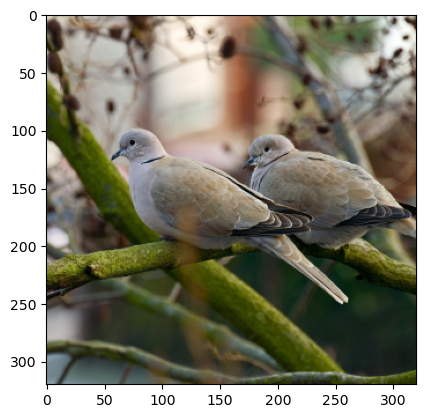

In [20]:
plt.imshow(original_image)

In [21]:
def compute_norm(X):
  norm = 0
  for x in X:
    norm += x ** 2

  return norm ** 0.5

In [22]:
def find_closest_centroids(X, centroids):
  m, n = X.shape
  K = centroids.shape[0]
  idx = np.zeros((m, ))
  for j in range(m):
    norm = compute_norm(X[j] - centroids[0])
    for i in range(1, K):
        if (norm > compute_norm(X[j] - centroids[i])):
          idx[j] = i

  return idx

In [23]:
def compute_centroids(X, idx, K):
  m, n = X.shape
  centroids = np.zeros((K,n))
  num_of_points = np.zeros((K,))

  for i in range(m):
    num_of_points[int(idx[i])] += 1
    centroids[int(idx[i])] += X[i]

  for c in range(K):
    centroids[c] /= num_of_points[c]
  return centroids


In [24]:
def run_KMeans(X, initial_centroids, num_of_iters=10, plot_progress=False):
  centroids = initial_centroids
  K = initial_centroids.shape[0]
  for i in range(num_of_iters):
    idx = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, idx, K)

  if (plot_progress):
    fig, ax = plt.subplots()
    for k in range(K):
      x = []
      y = []
      for j in range(len(idx)):
        if (idx[j] == k):
          x.append(X[j])
          y.append(Y[j])
      x = np.array(x)
      ax.scatter(x[:,4], x[:,5])
      fig.show()

  return centroids, idx

In [25]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

In [26]:
X_img = np.reshape(original_image, (original_image.shape[0] * original_image.shape[1], 3))

In [27]:
initial_centroids = kMeans_init_centroids(X_img, 4)
centroids, idx = run_KMeans(X_img, initial_centroids, 5)

/var/folders/py/3ftbrdb14bz145vdgkd0y1f40000gn/T/ipykernel_7880/1657608606.py:11: RuntimeWarning: invalid value encountered in divide
  centroids[c] /= num_of_points[c]


In [28]:
centroids

array([[105.95536377,  99.51018333,  75.36844131],
       [         nan,          nan,          nan],
       [ 43.05956495,  48.10377839,  24.00246417],
       [183.00514474, 174.20246817, 162.64416659]])

In [29]:
idx = find_closest_centroids(X_img, centroids)
idx = idx.astype("int64")

In [30]:
X_recovered = centroids[idx, :]

In [31]:
X_recovered = np.reshape(X_recovered, original_image.shape)
X_recovered = X_recovered.astype("int64")

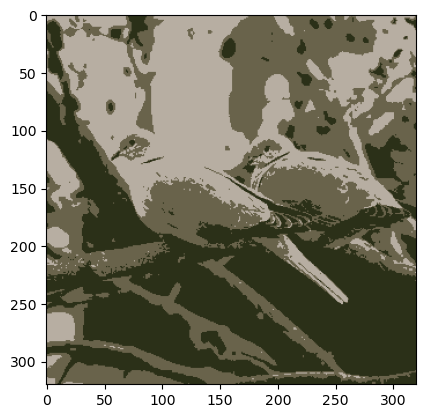

In [32]:
fig, ax = plt.subplots()
ax.imshow(X_recovered)